In [5]:
# We will create a short signal when the price reaches its lowest point. We will get
# out of a position by having the price crossing the moving average of the last
# window_size days. This code starts the turtle_trading function by creating a
# column to store the highs, the lows, and the average with a rolling window
# window_size:
def turtle_trading(financial_data, window_size):
    signals = pd.DataFrame(index=financial_data.index)
    signals['orders'] = 0
    # window_size-days high
    signals['high'] = financial_data['Close'].shift(1).rolling(window=window_size).max()
    # window_size-days low
    signals['low'] = financial_data['Close'].shift(1).rolling(window=window_size).min()
    # window_size-days mean
    signals['avg'] = financial_data['Close'].shift(1).rolling(window=window_size).mean()
    signals['long_entry'] = financial_data['Close'] > signals.high
    signals['short_entry'] = financial_data['Close'] < signals.low
    signals['long_exit'] = financial_data['Close'] < signals.avg
    signals['short_exit'] = financial_data['Close'] > signals.avg
    init=True
    position=0
    for k in range(len(signals)):
        if signals['long_entry'][k] and position==0:
            signals.orders.values[k] = 1
            position=1
        elif signals['short_entry'][k] and position==0:
            signals.orders.values[k] = -1
            position=-1
        elif signals['short_exit'][k] and position>0:
            signals.orders.values[k] = -1
            position = 0
        elif signals['long_exit'][k] and position < 0:
            signals.orders.values[k] = 1
            position = 0
        else:
            signals.orders.values[k] = 0
    return signals

In [3]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import math as math


In [6]:
sbi =  yf.Ticker(str('SBIN')+'.NS').history(period="10y")
ts=turtle_trading(sbi, 50)

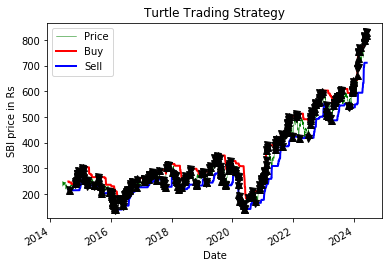

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='SBI price in Rs')
sbi["Close"].plot(ax=ax1, color='g', lw=.5)
ts["high"].plot(ax=ax1, color='r', lw=2.)
ts["low"].plot(ax=ax1, color='b', lw=2.)
ax1.plot(ts.loc[ts.orders== 1.0].index,
sbi["Close"][ts.orders == 1],'^', markersize=7, color='k')
ax1.plot(ts.loc[ts.orders== -1.0].index,
sbi["Close"][ts.orders == -1],'v', markersize=7, color='k')
plt.legend(["Price","Buy","Sell"])
plt.title("Turtle Trading Strategy")
plt.show()